In [1]:
# Package
import sys
sys.path.append("../..")

In [2]:
from create_data import load_data
from utils import * # Number of testing samples
import numpy as np
import matplotlib.pyplot as plt
from time import time
from functools import partial

import jax
import jax.numpy as jnp
from jax.nn.initializers import glorot_normal, normal
from jax.example_libraries import optimizers

In [3]:
SEED = 42

In [4]:
train, test = load_data("Lorenz 96, F = 8", "../../data/lorenz8", 0.5)

In [5]:
print(f"Train size: {train.data.shape}")
print(f"Test size: {test.data.shape}")

Train size: (90000, 40)
Test size: (90000, 40)


**Create test set**

In [6]:
L_forecast_test = 400   # steps to forecast forward (when testing)

In [7]:
np.random.seed(1)

data_test = test.data

T_test, data_dim = data_test.shape
possible_idx = T_test - (L_forecast_test + 1) # minus number of steps forward, and the warm-up period
T_indices = np.random.randint(0, possible_idx, size = NUM_TEST)

t_past_batch = np.repeat(T_indices[:, None], WARM_UP_TEST, axis = 1).astype(int) # 2000 warmup 
t_pred_batch = (T_indices[:, None] + np.arange(1, 1 + L_forecast_test)[None, :].astype(int))

X_test = data_test[t_past_batch]
y_test = data_test[t_pred_batch]

In [8]:
print(f"Test input size: {X_test.shape}")  # Number of test points x input length x dim
print(f"Test output size: {y_test.shape}") # Number of test points x horizon x dim

Test input size: (100, 2000, 40)
Test output size: (100, 400, 40)


# Load Predictions

In [10]:
rnn = load_obj("results/rnn_pred.pkl")
lstm = load_obj("results/lstm_pred.pkl")
rc = load_obj("results/rc_pred.pkl")
koop = load_obj("results/koopman_pred.pkl")

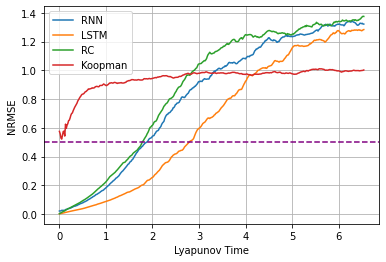

In [65]:
plt.plot(np.arange(400) * 0.01 / LORENZ_LT, np.median(np.sqrt(((rnn - y_test)**2).mean(axis = 2)), axis = 0), label = "RNN")
plt.plot(np.arange(400) * 0.01 / LORENZ_LT, np.median(np.sqrt(((lstm - y_test)**2).mean(axis = 2)), axis = 0), label = "LSTM")
plt.plot(np.arange(400) * 0.01 / LORENZ_LT, np.median(np.sqrt(((rc - y_test)**2).mean(axis = 2)), axis = 0), label = "RC")
plt.plot(np.arange(400) * 0.01 / LORENZ_LT, np.median(np.sqrt(((koop - y_test)**2).mean(axis = 2)), axis = 0), label = "Koopman")
plt.ylabel("NRMSE")
plt.xlabel("Lyapunov Time")
plt.axhline(0.5, c = "purple", ls = "--")
plt.grid()
plt.legend()
plt.savefig("lorenz_comparison.png", facecolor = "white", bbox_inches = "tight")
plt.show()